<br>
<h1 style="font-family:sans-serif; text-align:center"> 
<!--     <span style='color: pink'> Twitter analysis of </span> -->
    <span style='color: white; font-size:50%; text-shadow: 0px 0px 15px black'> Twitter analysis of </span>
<!--     <span style='color:#00acee'> Twitter analysis of </span> -->
<!--     <span style="-webkit-text-stroke"> Twitter analysis of</span> -->
<!--     <span class="hr3" style='color:#e40843; letter-spacing: 4px; font-size:105%'> Canada</span> -->
    <span class="hr3" style='color:#e40843; font-size:60%; text-shadow: 0px 0px 30px pink'>Canada </span> <span class="hr3" style='color:gray; font-size:50%; text-shadow: 0px 0px 30px pink'>response to Covid-19</span><br>
</h1>

# EDA

The aim of this notebook is to perform an Exploratory Data Analysis (EDA) to the retrieved tweets obtained using *snscrape*, from March 1st to April 30th of 2020, from Government of Canada official Twitter accounts.

_Authors: Leo Cuspinera ([cuspime](https://github.com/cuspime)) and Victor Cuspinera ([vcuspinera](https://github.com/vcuspinera))_

## Import libraries

In [1]:
# General libraries
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime, timedelta, date
from pytz import timezone
import json

# To plot
# import altair as alt
# alt.renderers.enable('mimetype')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Open `json` file with all tweets

In [2]:
%%time

# Parameters
my_folder = "../tweets/"

# Open the file
df_tot = pd.read_json(my_folder + 'tweets_db_sentiment.json')

CPU times: user 45.1 s, sys: 5.68 s, total: 50.7 s
Wall time: 51.6 s


## Basic analysis

In [3]:
# A first view of the data frame
df_tot.tail(3)

,account,date,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location,tweet,day,announcement,polarity,subjectivity
2915142,JustinTrudeau,2020-04-30 00:00:27,1,0,2,0,en,Twitter for iPhone,SRodrigues52,219,412,"London, On",@shelbzzzzy @justintrudeau quit your job 🧐,2020-04-30,True,0.000000,0.000000
2915143,JustinTrudeau,2020-04-30 00:00:19,1,0,0,0,en,Twitter for iPhone,pffoote,356,1531,"St. John's, NL, Canada",@rcaf_arc @cfsnowbirds @canadianforces @cfoper...,2020-04-30,True,0.392857,0.517857
2915144,JustinTrudeau,2020-04-30 00:00:08,0,0,0,0,en,Twitter Web App,DavidCBarron,231,331,Brampton Ontario,@cbcnews @ctvnews @justintrudeau @celliottabil...,2020-04-30,True,-1.000000,1.000000


**the number changed** I don't know why they have been filtered.

In [5]:
# number of tweets
len(df_tot)

2915145

In [6]:
# Check if it contains the rigth tweets
%time df_tot.groupby(['account']).count()

CPU times: user 1.05 s, sys: 37.3 ms, total: 1.09 s
Wall time: 1.09 s


,date,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location,tweet,day,announcement,polarity,subjectivity
account,,,,,,,,,,,,,,,,
Canada,2241754,2241754,2241754,2241754,2241754,2241754,2241740,2241754,2241754,2241754,2241754,2241754,2241754,2241754,2241754,2241754
CanadianPM,30429,30429,30429,30429,30429,30429,30429,30429,30429,30429,30429,30429,30429,30429,30429,30429
GovCanHealth,22144,22144,22144,22144,22144,22144,22144,22144,22144,22144,22144,22144,22144,22144,22144,22144
JustinTrudeau,620818,620818,620818,620818,620818,620818,620818,620818,620818,620818,620818,620818,620818,620818,620818,620818


In [7]:
df_tot.describe()

,replyCount,retweetCount,likeCount,quoteCount,followersCount,friendsCount,polarity,subjectivity
count,2.915145e+06,2.915145e+06,2.915145e+06,2.915145e+06,2.915145e+06,2.915145e+06,2.915145e+06,2.915145e+06
mean,8.207791e-01,2.085869e+00,7.689637e+00,2.653261e-01,1.762643e+04,1.560635e+03,9.185500e-02,3.716961e-01
std,1.518420e+01,9.872141e+01,4.159363e+02,1.639644e+01,4.237202e+05,6.803892e+03,2.772734e-01,2.978601e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+01,1.700000e+02,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.460000e+02,5.300000e+02,0.000000e+00,4.000000e-01
75%,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.809000e+03,1.493000e+03,2.272727e-01,5.750000e-01
max,7.498000e+03,9.977500e+04,4.676340e+05,1.500900e+04,8.380480e+07,1.441770e+06,1.000000e+00,1.000000e+00



```
account                 4
date              2338472
replyCount            681
retweetCount         1391
likeCount            2759
quoteCount            444
lang                   62
sourceLabel          6264
username          1069132
followersCount      65596
friendsCount        21186
location           223513
tweet             3060973
dtype: int64
```
Before, we had something like this. now after importing the tweets_sentiment.json I have:

In [8]:
# See the number of unique terms per each variable
df_tot.nunique()

account                 4
date              2045389
replyCount            655
retweetCount         1265
likeCount            2588
quoteCount            429
lang                    1
sourceLabel          4621
username           838291
followersCount      53545
friendsCount        19376
location           170132
tweet             2565892
day                    61
announcement            2
polarity            45773
subjectivity        29863
dtype: int64

In [9]:
# tweets by `Account`
print("Number of tweets by Account:\n")
pd.DataFrame(df_tot['account'].value_counts())

Number of tweets by Account:



,account
Canada,2241754
JustinTrudeau,620818
CanadianPM,30429
GovCanHealth,22144


In [9]:
# tweets by `language`
languages_twitter = pd.read_csv(my_folder + "twitter_supported_languages.csv", skiprows=5)
languages_twitter

print("Number of tweets by Languages:")
print("  -- the most used ones --\n")
data_langs = pd.DataFrame(df_tot['lang'].value_counts().head()).\
            reset_index().rename(columns={'index':'Language_code', 'lang':'tweets'})

# languages_twitter
pd.merge(languages_twitter, data_langs, how="right", on=["Language_code", "Language_code"])


Number of tweets by Languages:
  -- the most used ones --



,Language_code,Name,tweets
0,en,English (default),2915145
1,es,Spanish,212901
2,fr,French,135014
3,und,NaN,91355
4,pt,Portuguese,48713


## EDA plots

In [10]:
%%time

# add column with day
df_tot['day'] = [df_tot['date'][i].strftime("%Y-%m-%d") for i in range(len(df_tot))]

CPU times: user 1min 19s, sys: 57.4 ms, total: 1min 19s
Wall time: 1min 19s


### Tweets per day by account

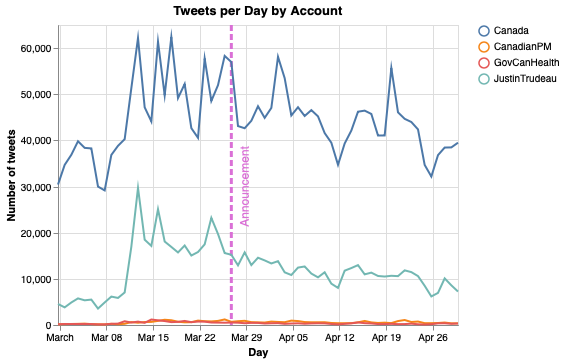

In [11]:
df_aux = pd.DataFrame(df_tot.groupby(['account', 'day'])['tweet'].count()).reset_index()

base = alt.Chart(df_aux)

lines = base.mark_line().encode(
    x = alt.X('day:T', title="Day"),
    y = alt.Y('tweet:Q', title="Number of tweets"),
    color = alt.Color('account'),
    tooltip = ['account', 'tweet']
).properties(
    title='Tweets per Day by Account'
)

rule = alt.Chart(pd.DataFrame({
    'day': ['2020-03-27'],
    'color': ['orchid']
})).mark_rule(size=3, strokeDash=[6,3]).encode(
  x='day:T',
  color=alt.Color('color:N', scale=None, title = "")
)

text = alt.Chart(pd.DataFrame({
    'day': ['2020-03-29'],
    'color': ['orchid'],
    'y1': [30_000],
    'y2': [3_000]
})).mark_text(
    text='Announcement', angle=270, size=12
).encode(
    x='day:T', y='y1',
    color=alt.Color('color:N', scale=None, title = "")
)

rule + lines + text

When comparing the tweets per day by Canadian Government Twitter accounts, we can find that between March and April 2020, [@Canada](https://twitter.com/Canada) had between 29.1 and 62.4 thousand tweets per day, followed by [@JustinTrudeau](https://twitter.com/JustinTrudeau) that had between 3.5 and 29.7 thousand tweets per day. However, this plot doesn't allow us to identify the number of tweets for the [@CanadianPM](https://twitter.com/CanadianPM) and [@GovCanHealth](https://twitter.com/GovCanHealth) accounts. The best way to show the number of tweets would be using logscale in the y-axis.

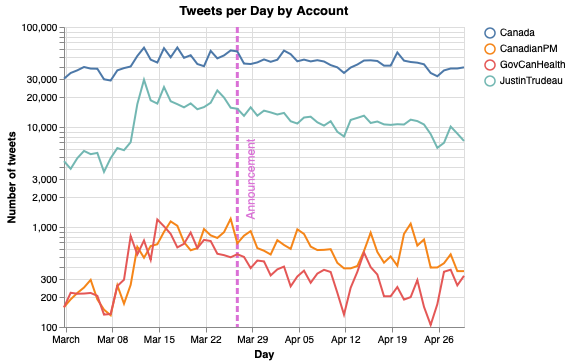

In [12]:
lines2 = lines.encode(
    y = alt.Y('tweet:Q', scale=alt.Scale(type='log'), title="Number of tweets")
)

text2 = text.encode(y='y2')

rule + lines2 + text2
# lines2

Additionally to the previous range of tweets for [@Canada](https://twitter.com/Canada) and [@JustinTrudeau](https://twitter.com/JustinTrudeau) accounts, with this plot it is easier to identify the number of tweets of the [@CanadianPM](https://twitter.com/CanadianPM) and [@GovCanHealth](https://twitter.com/GovCanHealth) accounts. While @CanadianPM one has between 131 and 1207 tweets, @GovCanHealth had between 105 and 1188 tweets.

While we were expecting to see an increase in the number of tweets after Trudeau announcement on March 27<sup>th</sup> of 2020, in the previous plots we identify that this hypothesis was wrong. However, we find something unexpected: in the four Canadian Government accounts we see and increment in number of tweets which had an important increase in number of tweets around March 12<sup>th</sup>.

### Proportion of tweets for each Account by Language

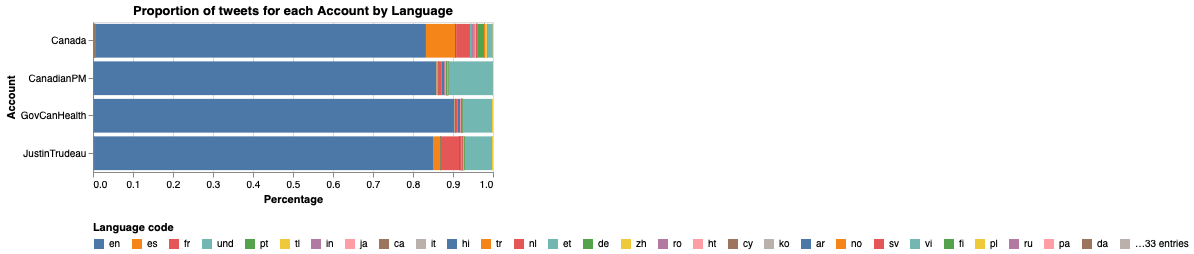

In [39]:
df_aux = pd.DataFrame(df_tot.groupby(['account', 'lang'])['tweet'].count()).reset_index()
sort_lang = pd.DataFrame(df_aux.groupby(['lang'])['tweet'].sum()).reset_index().sort_values(by=['tweet'], ascending=False).reset_index()['lang']

alt.Chart(df_aux).mark_bar().encode(
    x=alt.X('sum(tweet)', stack="normalize", title="Percentage"),
    y=alt.Y('account', title="Account"),
    color=alt.Color('lang', sort=sort_lang.to_list(), title="Language code", legend=alt.Legend(orient="bottom")),
    tooltip=['account' , 'lang']
).properties(
    title='Proportion of tweets for each Account by Language',
    height=150
)


Here we can identify that tweets mainly in English. The second and third languages were Spanish and French. Also, we can see that a large number of tweets have an undefined language.

### Users with most tweets that mention/or are related with the official Canadian accounts

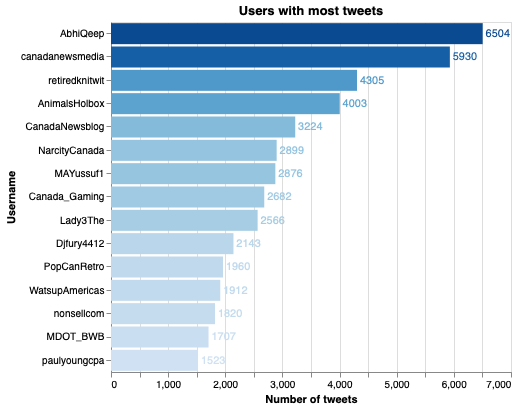

In [14]:
df_aux = pd.DataFrame(df_tot.groupby(['username'])['tweet'].count()).reset_index().sort_values(by=['tweet'], ascending=False).reset_index(drop=True)

bars = alt.Chart(df_aux[:15]).mark_bar().encode(
    x=alt.X('tweet', title="Number of tweets"),
    y=alt.Y('username', sort=list(df_aux['username'][:15]), title="Username"),
    color=alt.Color('tweet', legend=None)
).properties(
    title='Users with most tweets'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='tweet:Q'
)

(bars + text).properties(height=350)

The users with most tweets mentioning any of the four Canadian Government Twitter accounts were __AbhiQeep__  which is an account that posts coordinates to find Pokemons, with 6,504 tweets; __canadanewsmedia__, the official account of Canada News Media, with 5,930 tweets; and __retiredknitwit__ from a retired Canadian woman, with 4,305 tweets.

### Users that tweet on official Canadian twitter accouns, with most followers

In [15]:
%%time

# Dataframe of followers per user user
df_followers = df_tot[['username', 'followersCount', 'account']].reset_index(drop=True)
df_followers = df_followers.groupby(['username']).mean().reset_index().sort_values(by=['followersCount'], ascending=False).reset_index(drop=True)
df_followers['followers_M'] = df_followers['followersCount'] / 1_000_000
df_followers.drop(['followersCount'], axis=1, inplace=True)

# Dataframe of tweets per official Canada twitter accounts
df_aux = df_tot[['username', 'account']]
df_aux['counts'] = 1
df_aux = df_aux.groupby(['username', 'account']).sum().reset_index()

# merge the previous dataframes
df_aux = pd.merge(df_aux, df_followers, on='username', how='outer').sort_values(by=['followers_M'], ascending=False).reset_index(drop=True)

CPU times: user 17.5 s, sys: 1.75 s, total: 19.2 s
Wall time: 13.4 s


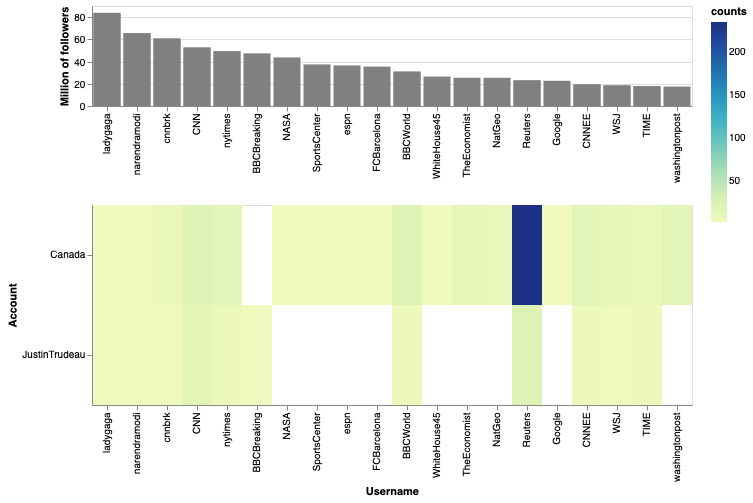

In [16]:
base = alt.Chart(df_aux.head(30)).encode(
    x=alt.X('username', sort=df_aux['username'].unique()[:1100], title='Username'),
    y=alt.Y('account', title='Account')
).properties(height=200, width=600)

top_hist = base.mark_bar(color="gray").encode(
    alt.X('username',
          sort=df_aux['username'].unique()[:1100],
          title=''
         ),
    alt.Y('followers_M', stack=None, title='Million of followers'),
    tooltip = ['username', 'followers_M']
).properties(height=100)

heat = base.mark_rect().encode(
    color='counts',
    tooltip = ['username', 'followers_M', 'counts']
)

top_hist & heat

In the previous plots we can identify the users with most followers that mention at least one Official Canadian account. Stand out users as __Lady Gaga__ the pop singer with 38.8 million followers, __Narendra Modi__ who is the current Prime Minister of India with 65.5 million followers, __CNN Breaking News__ with 60.7 million users.

### Users that tweet on official Canadian twitter accouns, with most friends

In [17]:
%%time

# Dataframe of followers per user user
df_followers = df_tot[['username', 'friendsCount', 'account']].reset_index(drop=True)
df_followers = df_followers.groupby(['username']).mean().reset_index().sort_values(by=['friendsCount'], ascending=False).reset_index(drop=True)
df_followers['friends_M'] = df_followers['friendsCount'] / 1_000_000
df_followers.drop(['friendsCount'], axis=1, inplace=True)

# Dataframe of tweets per official Canada twitter accounts
df_aux = df_tot[['username', 'account']]
df_aux['counts'] = 1
df_aux = df_aux.groupby(['username', 'account']).sum().reset_index()

# merge the previous dataframes
df_aux = pd.merge(df_aux, df_followers, on='username', how='outer').sort_values(by=['friends_M'], ascending=False).reset_index(drop=True)

CPU times: user 11.1 s, sys: 411 ms, total: 11.5 s
Wall time: 11.5 s


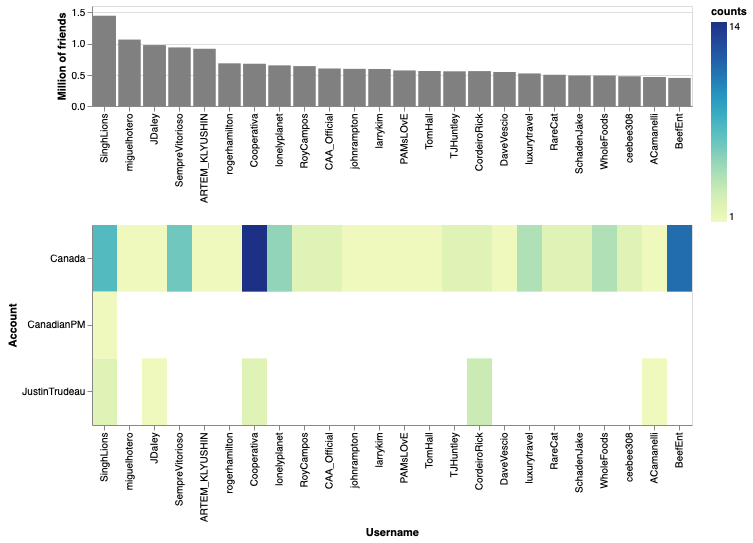

In [18]:
base = alt.Chart(df_aux.head(30)).encode(
    x=alt.X('username', sort=df_aux['username'].unique()[:1100], title='Username'),
    y=alt.Y('account', title='Account')
).properties(height=200, width=600)

top_hist = base.mark_bar(color="gray").encode(
    alt.X('username',
          sort=df_aux['username'].unique()[:1100],
          title=''
         ),
    alt.Y('friends_M', stack=None, title='Million of friends'),
    tooltip = ['username', 'friends_M']
).properties(height=100)

heat = base.mark_rect().encode(
    color='counts',
    tooltip = ['username', 'friends_M', 'counts']
)

top_hist & heat

This analysis is similar to the analysis of the previous section. In this case the users with more friends are the __Harjinder Singh Kukreja__ who is a restaurateur and social activist from India with 1.44 million twitter friends, __Miguel H Otero__ who is the Presidente Editor of Diario El Nacional with 1.06 million friends, and __Jordan Daley__ an entrepreneur with 0.97 million friends.

### Tokens per tweet distribution

In [19]:
# count the tokens per tweets
%time tweet_size = [len(tweet) for tweet in df_tot['tweet']]

source = pd.DataFrame(tweet_size).reset_index().rename(columns = {0:"tokens", 'index': "counts"})
source = source.groupby(['tokens']).count().reset_index()

CPU times: user 565 ms, sys: 15 ms, total: 580 ms
Wall time: 580 ms


In [20]:
base = alt.Chart(source).mark_line().encode(
    x=alt.X("tokens:Q"),
    y=alt.Y('counts', title="Count of records")
).properties(
    title='Histogram of number of tokens by tweet'
)

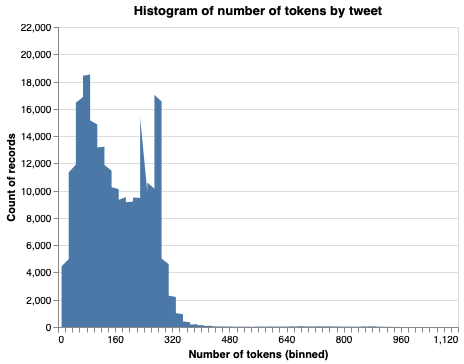

In [21]:
histo = base.mark_area().encode(x=alt.X("tokens:Q", bin=alt.Bin(maxbins=70), title="Number of tokens (binned)"))
#line = base.transform_regression('tokens', 'counts', method="poly", order=1).mark_line(size=4, color="salmon")
histo

### Analysis by location

In [22]:
pd.DataFrame(df_tot.groupby(['location'])['tweet'].count()).reset_index().sort_values(by=['tweet'], ascending=False).reset_index(drop=True)

,location,tweet
0,,974993
1,Canada,204791
2,"Toronto, Ontario",92833
3,"Ontario, Canada",62237
4,Toronto,48435
...,...,...
223508,Republik of Buffalo,1
223509,Republik Seakan2,1
223510,Dumpster outside Disneyland,1
223511,Republiek Amsterdam,1


The location of the tweets depends on description manually given by the user. It looks ambiguous and probably is not very useful for this analysis.

### Heatmap with number of tweets per day by official Canada account

In [23]:
# wrangling data
source = df_tot.groupby(['account', 'day'])['tweet'].count().reset_index()
aux_tot = df_tot.groupby(['account'])['tweet'].count().reset_index().rename(columns = {'tweet': 'total'})

# auxiliar dataframe
df_aux = pd.merge(source, aux_tot, on='account', how='left')
df_aux['weight'] = df_aux['tweet']/df_aux['total']
df_aux.head()

,account,day,tweet,total,weight
0,Canada,2020-03-01,30429,2711168,0.011224
1,Canada,2020-03-02,34689,2711168,0.012795
2,Canada,2020-03-03,36879,2711168,0.013603
3,Canada,2020-03-04,39812,2711168,0.014684
4,Canada,2020-03-05,38378,2711168,0.014156


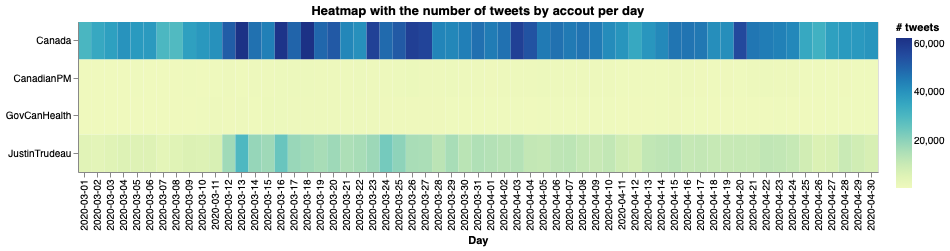

In [24]:
# heatmap with the number of tweets by accout, per day
base = alt.Chart(df_aux).mark_rect().encode(
    x=alt.X('day:O', title="Day"),
    y=alt.Y('account:O', title=""),
    color=alt.Color('tweet:Q', title="# tweets")
).properties(height=150, width=800)

base.properties(title='Heatmap with the number of tweets by accout per day')

With this heatmap we can identify the accounts with most tweets, but it is not as useful for identidying the days with more tweets for the accounts [@CanadianPM](https://twitter.com/CanadianPM) and [@GovCanHealth](https://twitter.com/GovCanHealth).

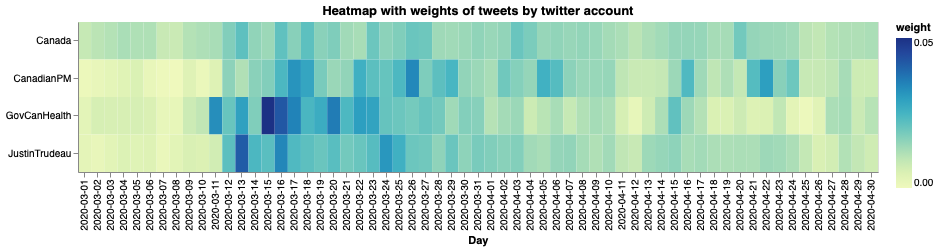

In [25]:
# use a heatmap to show the number of tweets by accout, per day
base.encode(color='weight').properties(title='Heatmap with weights of tweets by twitter account')

In the previous heatmap we normalize the number of tweets by each Twitter account. With this plot, we can identify a higher number of tweets for all twitter accounts between March 12 and March 29, 2020.  

### Reply, retweet, like, quote, followers and friends count by account

In [26]:
# Count information
pd.DataFrame(df_tot.groupby(['account']).sum()).reset_index()


,account,replyCount,retweetCount,likeCount,quoteCount,followersCount,friendsCount
0,Canada,2050373,5639579,19909924,661910,54205081043,4624665705
1,CanadianPM,22976,53992,160657,6982,187413874,38708941
2,GovCanHealth,15876,68065,122038,5361,362793382,29784158
3,JustinTrudeau,639872,1440173,5691457,195812,14072894210,937405426


In [27]:
# Count information per day
df_aux = pd.DataFrame(df_tot.groupby(['account', 'day']).sum()).reset_index()
df_aux

,account,day,replyCount,retweetCount,likeCount,quoteCount,followersCount,friendsCount
0,Canada,2020-03-01,21747,64961,250035,5687,520249107,68923492
1,Canada,2020-03-02,21085,53198,194947,5632,714455150,64589072
2,Canada,2020-03-03,26773,92117,320632,7998,520697101,66659027
3,Canada,2020-03-04,26699,71002,245418,8252,811413266,70879281
4,Canada,2020-03-05,28933,79753,252414,7873,663494304,70743451
...,...,...,...,...,...,...,...,...
239,JustinTrudeau,2020-04-26,4066,10529,34948,891,86889938,7556038
240,JustinTrudeau,2020-04-27,8524,11627,39660,1713,120519742,8956027
241,JustinTrudeau,2020-04-28,10949,22769,162648,1892,329798769,10679165
242,JustinTrudeau,2020-04-29,7567,12250,47056,1649,203843651,9279910


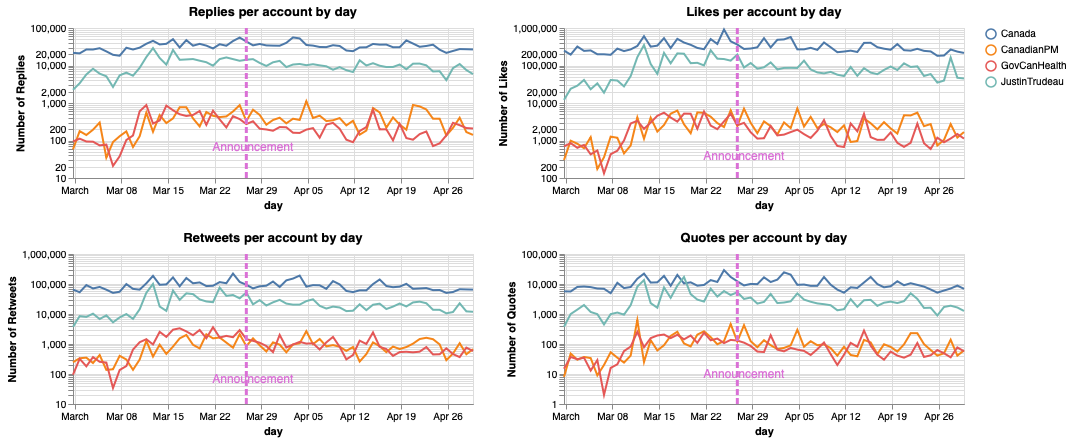

In [28]:
# Replies per account by day
base = alt.Chart(df_aux).mark_line().encode(
    x = 'day:T',
    color = 'account'
).properties(width=400, height=150)

replies = base.encode(
    y = alt.Y('replyCount', scale=alt.Scale(type='log'), title="Number of Replies"),
).properties(title='Replies per account by day')


# Retweets per account by day
retweets = base.encode(
    y = alt.Y('retweetCount', scale=alt.Scale(type='log'), title="Number of Retweets"),
).properties(title='Retweets per account by day')


# Likes per account by day
likes = base.encode(
    y = alt.Y('likeCount', scale=alt.Scale(type='log'), title="Number of Likes"),
).properties(title='Likes per account by day')


# Quotes per account by day
quotes = base.encode(
    y = alt.Y('quoteCount', scale=alt.Scale(type='log'), title="Number of Quotes"),
).properties(title='Quotes per account by day')


# announcement date
rule = alt.Chart(pd.DataFrame({
    'day': ['2020-03-27'],
    'color': ['orchid']
})).mark_rule(size=3, strokeDash=[6,3]).encode(
  x='day:T',
  color=alt.Color('color:N', scale=None, title = "")
)

text = alt.Chart(pd.DataFrame({
    'day': ['2020-03-28'],
    'color': ['orchid'],
    'y1': [70],
    'y2': [400],
    'y3': [10]
})).mark_text(
    text='Announcement', angle=0, size=12
).encode(
    x='day:T', y='y1',
    color=alt.Color('color:N', scale=None, title = "")
)

p1 = replies + rule + text
p2 = retweets + rule + text
p3 = likes + rule + text.encode(y='y2')
p4 = quotes + rule + text.encode(y='y3')

(p1 & p2) | (p3 & p4)

The four previous plots about replies, retweets, likes and quotes coincide with the previous information and plots about tweets per day by Account.

# Time Series Analysis
I will work here for the time being:

In [57]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (18,6)

In [11]:
df=df_tot

In [12]:
df.columns

Index(['account', 'date', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'lang', 'sourceLabel', 'username', 'followersCount',
       'friendsCount', 'location', 'tweet', 'day', 'announcement', 'polarity',
       'subjectivity'],
      dtype='object')

In [17]:
idx = pd.date_range(start=df.date.min(), end=df.date.max(), freq='D')
idx

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
      

In [28]:
source = df_tot.groupby(['account', 'day'])['tweet'].count().reset_index()
source = source.set_index('day')

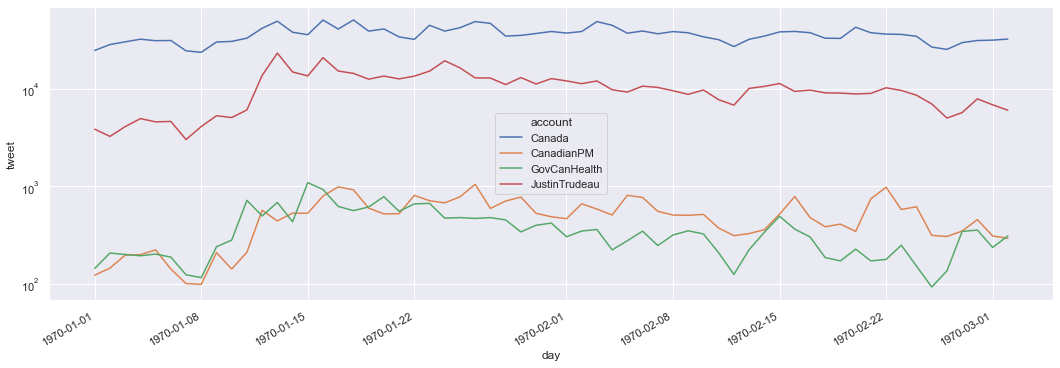

In [64]:
# Plot
fig, ax = plt.subplots()
sns.lineplot(x=source.index, y='tweet', hue='account', data=source, ax=ax)

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set(yscale='log')
fig.autofmt_xdate()
plt.show()

In [65]:
df.columns

Index(['account', 'date', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'lang', 'sourceLabel', 'username', 'followersCount',
       'friendsCount', 'location', 'tweet', 'day', 'announcement', 'polarity',
       'subjectivity'],
      dtype='object')

In [78]:
if type(df.day[0])==str:
    df.day = pd.to_datetime(df.day)

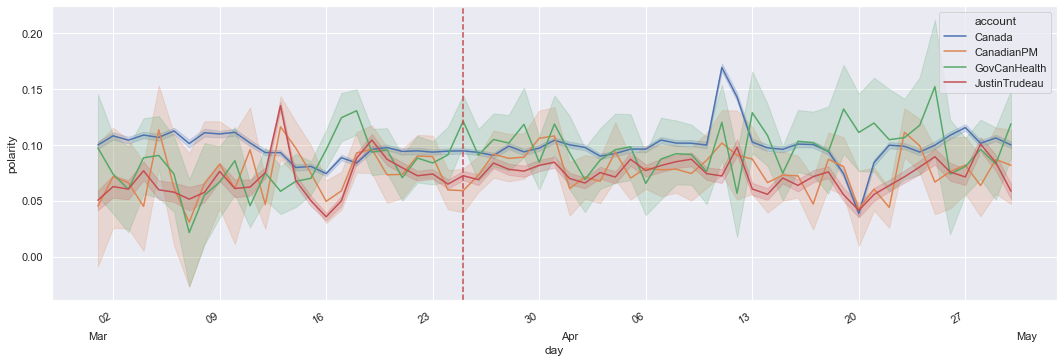

In [87]:
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='day', y='polarity', hue='account', data=df, ax=ax)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n\n%b'))
ax.axvline(pd.to_datetime('2020-03-25'), color='r', linestyle='--')
fig.autofmt_xdate()
plt.show()

## ETS decomposition
Here we make an Error, Trend, Seasonality decomposition to check whether we have some trend or not.
First we quickly check out all of the accounts:

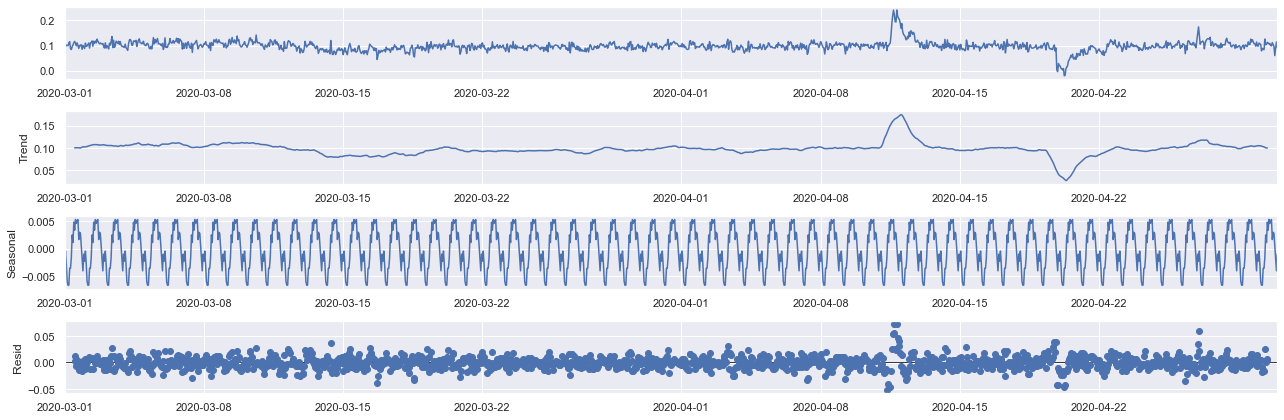

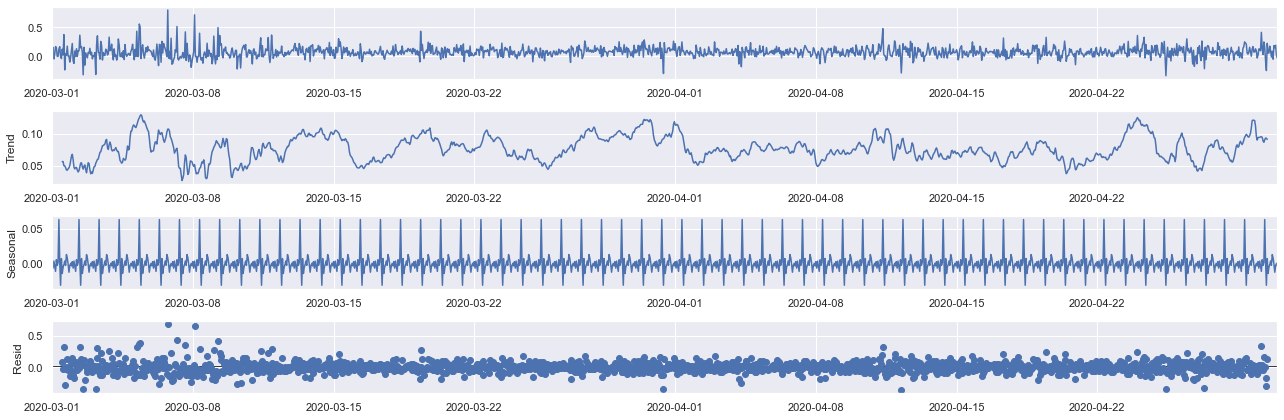

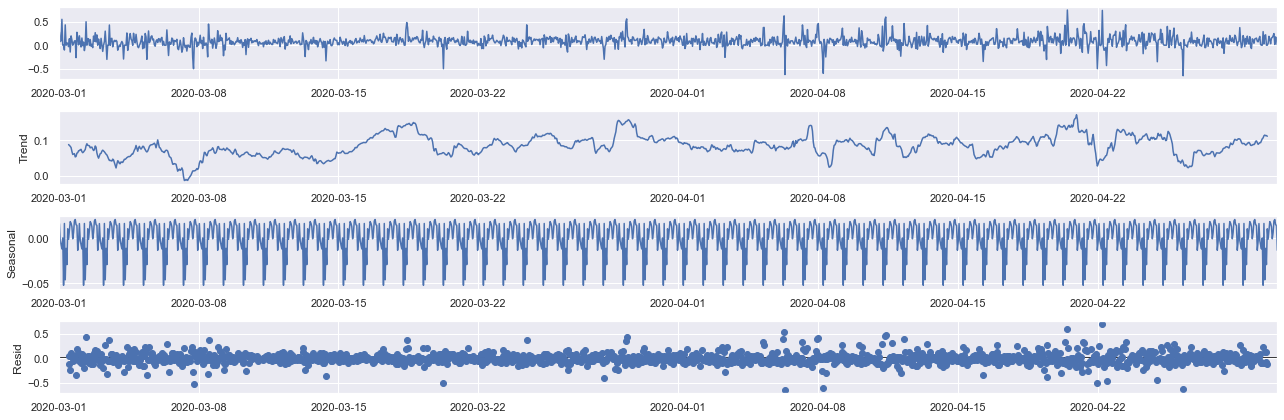

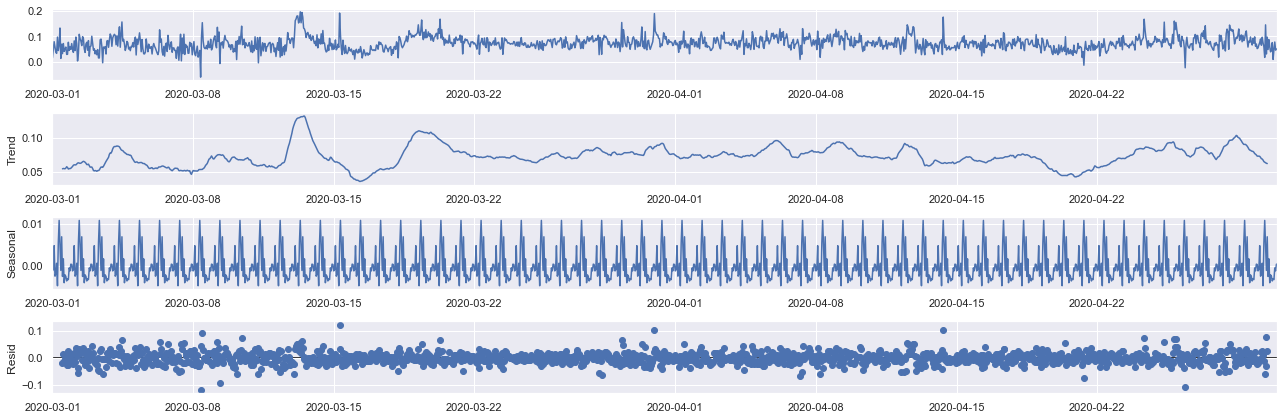

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose
for i in df.account.unique():
    try:
        df_r = df.loc[df.account==i , ['polarity','date']].set_index('date').resample('H').mean().fillna(0)
    except ValueError:
        df_r = df.loc[df.account==i , ['polarity','date']].set_index('date').resample('D').mean().fillna(0)
    seasonal_decompose( df_r, model='additive').plot();

Now, we focus on the trend only

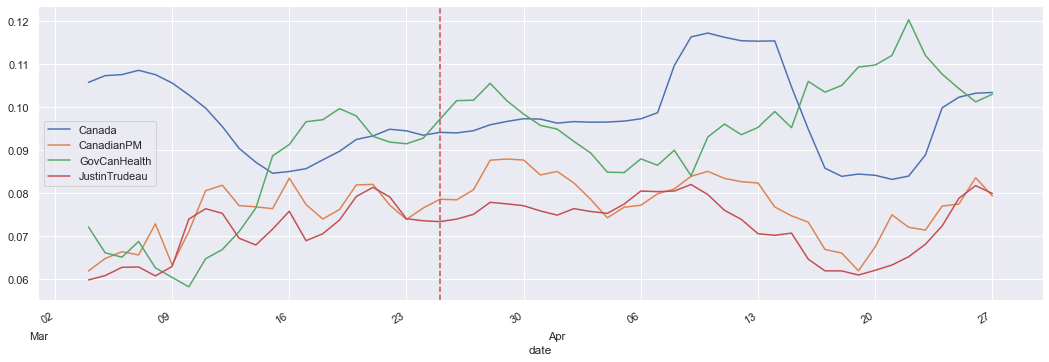

In [153]:
fig, ax = plt.subplots()
df_dic={}
for i in df.account.unique():
    try:
        df_r = df.loc[df.account==i , ['polarity','date']].set_index('date').resample('D').mean().fillna(0)
    except:
        pass
    df_dic[i] = seasonal_decompose( df_r, model='additive').trend
    df_dic[i].plot(ax=ax, label=i);

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n\n%b'))
ax.axvline(pd.to_datetime('2020-03-25'), color='r', linestyle='--')
ax.legend()
ax.yaxis.set_label('Daily polarity average')
fig.autofmt_xdate()
plt.show()

This is interesting, it seems like right after the tweets there was a slight rise in the polarity levels. although it seems that around the 10th of Apr things went even better. **What happened here?**

For the time being, let's focus a little bit more on days that were closer to the 25th:

In [165]:
df_dic[i][(df_dic[i].index>'2020-03-20')&(df_dic[i].index<'2020-03-30')]

date
2020-03-21    0.081392
2020-03-22    0.079151
2020-03-23    0.074087
2020-03-24    0.073612
2020-03-25    0.073407
2020-03-26    0.074003
2020-03-27    0.075101
2020-03-28    0.077903
2020-03-29    0.077549
Freq: D, Name: trend, dtype: float64

<AxesSubplot:xlabel='date'>

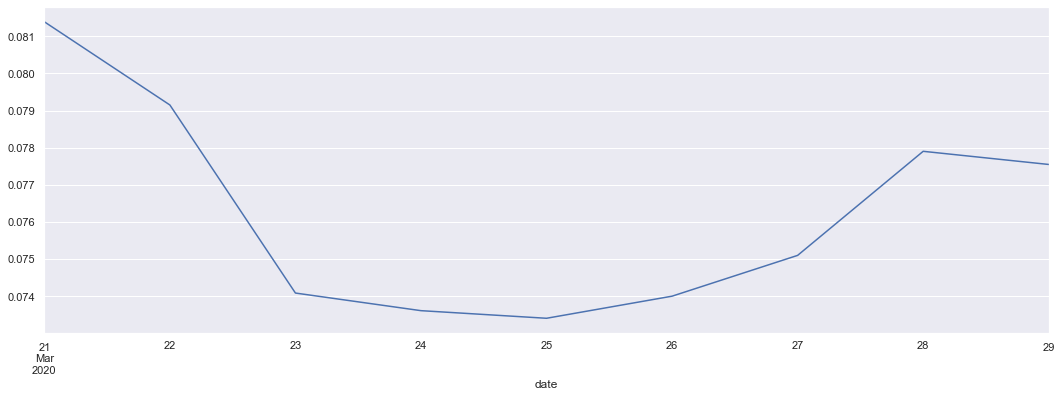

In [169]:
df_dic[i][(df_dic[i].index>lower_bound)&(df_dic[i].index<upper_bound)].plot()

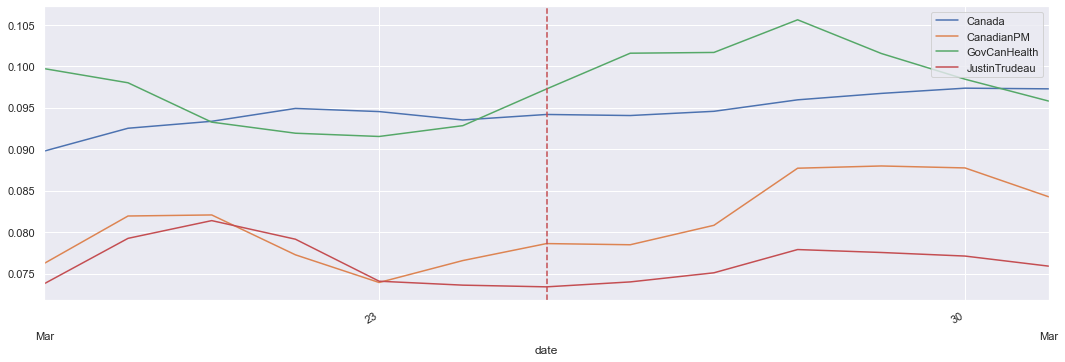

In [171]:
fig, ax = plt.subplots()
lower_bound='2020-03-18'
upper_bound='2020-04-01'
for i in df_dic.keys():
    df_dic[i][(df_dic[i].index>lower_bound)&(df_dic[i].index<upper_bound)].plot(ax=ax, label=i);

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n\n%b'))
ax.axvline(pd.to_datetime('2020-03-25'), color='r', linestyle='--')
ax.legend()
ax.yaxis.set_label('Daily polarity average')
fig.autofmt_xdate()
plt.show()